In [666]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [667]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [668]:
y.index = y.name

In [669]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [670]:
y.index = pd.to_datetime(y.index)

In [671]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [672]:
#pip install pytrends

In [673]:
from pytrends.request import TrendReq
import time

In [674]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone 15", "MacBook", "Apple Music", "Apple TV", "inflation", "Stock", "Steam", "starbucks mug", "Six Flags"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    time.sleep(5)
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [675]:
df = df.resample("Q").mean()

In [676]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [677]:
from sklearn.preprocessing import StandardScaler

In [678]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [679]:
from sklearn.linear_model import Lasso

In [680]:
lasso = Lasso(alpha=.5)

In [681]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [682]:
coefficients = lasso.coef_

In [683]:
import matplotlib.pyplot as plt

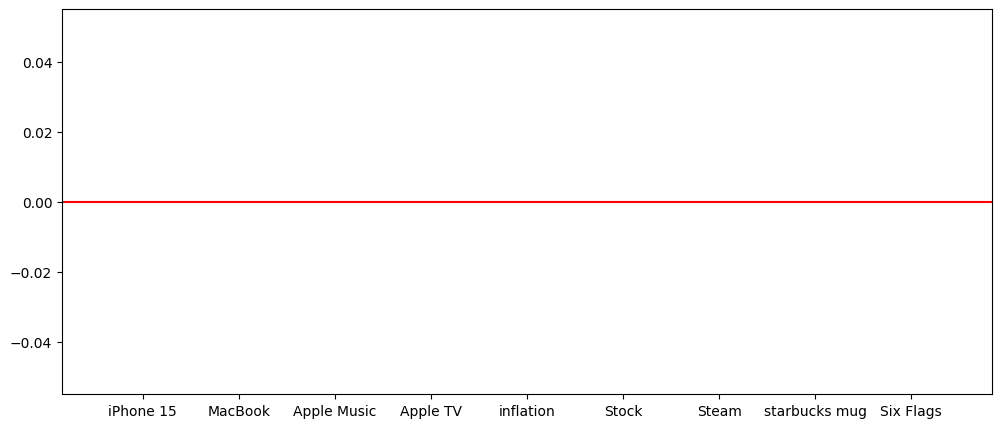

[ 0.  0.  0.  0.  0.  0.  0.  0. -0.]


In [684]:
plt.figure(figsize = (12,5))
plt.bar(X.columns, coefficients)
plt.axhline(0, color = "red")
plt.show()
print(coefficients)

# 5.) Do these coefficient magnitudes make sense?

In [685]:
lasso_3 = Lasso(alpha=.3)

In [686]:
lasso_3.fit(X_scaled, y)

Lasso(alpha=0.3)

In [687]:
coefficients_3 = lasso_3.coef_

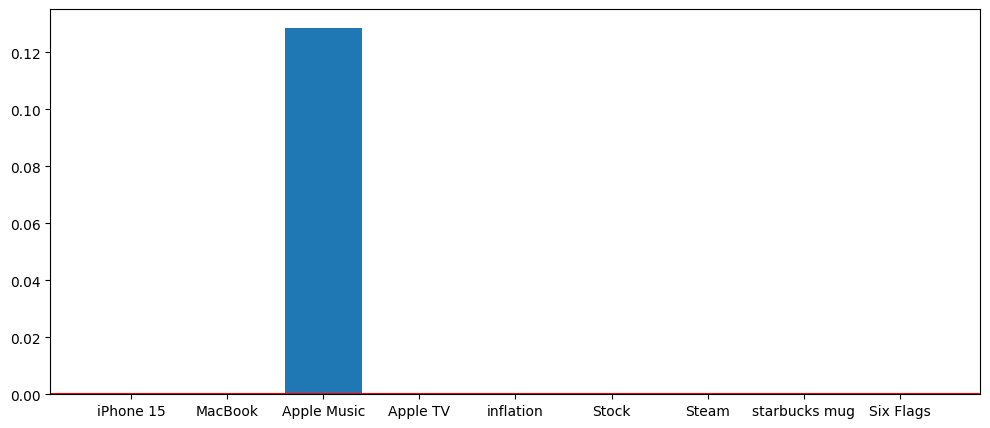

[ 0.          0.          0.12866906  0.          0.          0.
  0.          0.         -0.        ]


In [688]:
plt.figure(figsize = (12,5))
plt.bar(X.columns, coefficients_3)
plt.axhline(0, color = "red")
plt.show()
print(coefficients_3)

In [689]:
lasso_1 = Lasso(alpha=.1)

In [690]:
lasso_1.fit(X_scaled, y)

Lasso(alpha=0.1)

In [691]:
coefficients_1 = lasso_1.coef_

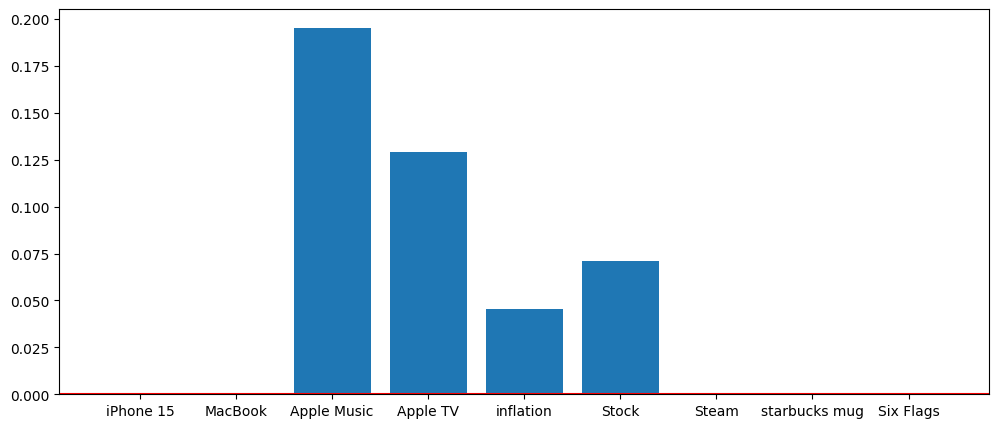

[ 0.          0.          0.19538129  0.12889555  0.04520208  0.07087274
  0.          0.         -0.        ]


In [692]:
plt.figure(figsize = (12,5))
plt.bar(X.columns, coefficients_1)
plt.axhline(0, color = "red")
plt.show()
print(coefficients_1)

The Lasso coefficient magnitudes with a lambda of 0.5 are all equal to 0. This is because the strength of the penalty applied to the coefficients is too large, leading to greater shrinkage of all the coefficients towards zero. We also tested two lower strengths of penalty: 0.3 and 0.1, to observe the changes in Lasso coefficient magnitudes. When lambda is 0.3, Apple Music is the only non-zero indicator, with a Lasso estimate of around 0.13. This makes sense, as Apple Music subscriptions contribute to Apple's earnings, given the large population of music listeners worldwide. When lambda is 0.1, there are four non-zero indicators: Apple Music, Apple TV, inflation, and Stock. This is logical because Apple Music and Apple TV are popular mediums for Apple users to consume media. On the other hand, inflation and Stock indicate the current economic situation, which also impacts Apple's earnings.